In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2017)

In [2]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

In [3]:
# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area"
                                      : "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]

# Set zipcode as index
census_pd = census_pd.set_index("Zipcode")

# Visualize
census_pd.head()

,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate
Zipcode,,,,,
00601,17599.0,11757.0,7041.0,11282.0,64.105915
00602,39209.0,16190.0,8978.0,20428.0,52.100283
00603,50135.0,16645.0,10897.0,25176.0,50.216416
00606,6304.0,13387.0,5960.0,4092.0,64.911168
00610,27590.0,18741.0,9266.0,12553.0,45.498369


In [4]:
# Create DataFrame for only Brooklyn zipcodes
brooklyn_df = census_pd.loc[["11212", "11213", "11216", "11233", "11238",  
                          "11209", "11214", "11228",  
                          "11204", "11218", "11219", "11230",  
                          "11234", "11236", "11239",  
                          "11223", "11224", "11229", "11235", 
                          "11201", "11205", "11215", "11217", "11231",  
                          "11203", "11210", "11225", "11226", 
                             "11207", "11208", 
                             "11211", "11222", "11220", "11232", 
                             "11206", "11221", "11237"], :]

# Add borough column
brooklyn_df['Borough'] = "Brooklyn"

In [5]:
# Create DataFrame for only Bronx zipcodes
bronx_df = census_pd.loc[["10453", "10457", "10460", 
                          "10458", "10467", "10468", 
                          "10451", "10452", "10456", 
                          "10454", "10455", "10459", "10474", 
                          "10463", "10471", 
                          "10466", "10469", "10470", "10475", 
                          "10461", "10462", "10464", "10465", "10472", "10473"], :]

# Add borough column
bronx_df['Borough'] = "Bronx"

In [6]:
# Create DataFrame for only Manhattan zipcodes
manhattan_df = census_pd.loc[["10026", "10027", "10030", "10037", "10039", 
                          "10001", "10011", "10018", "10019", "10036", 
                          "10029", "10035", 
                          "10010", "10016", "10017", "10022", 
                          "10012", "10013", "10014", 
                          "10004", "10005", "10006", "10007", "10038", "10280", 
                              "10002", "10003", "10009", "10021", "10028", "10044", 
                              "10065", "10075", "10128", "10023", "10024", "10025", 
                              "10031", "10032", "10033", "10034", "10040"], :]

# Add borough column
manhattan_df['Borough'] = "Manhattan"

In [7]:
# Create DataFrame for only Staten Island zipcodes
staten_is_df = census_pd.loc[["10302", "10303", "10310", 
                          "10306", "10307", "10308", "10309", "10312", 
                          "10301", "10304", "10305", 
                          "10314"], :]

# Add borough column
staten_is_df['Borough'] = "Staten Island"

In [8]:
# Create DataFrame for only Queens zipcodes
queens_df = census_pd.loc[["11361", "11362", "11363", "11364", 
                           "11354", "11355", "11356", "11357", "11358", 
                           "11360", "11365", "11366", "11367", 
                           "11412", "11423", "11432", "11433", "11434", "11435", "11436", 
                           "11101", "11102", "11103", "11104", "11105", "11106", 
                           "11374", "11375", "11379", "11385", 
                           "11691", "11692", "11693", "11694", "11697", 
                           "11004", "11005", "11411", "11413", "11422", "11426", "11427", 
                           "11428", "11429", "11414", "11415", "11416", "11417", 
                           "11418", "11419", "11420", "11421", 
                           "11368", "11369", "11370", "11372", "11373", "11377", 
                           "11378"], :]

# Add borough column
queens_df['Borough'] = "Queens"

In [9]:
# Combine borough DataFrames to one DataFrame
combined_data = pd.concat([bronx_df, brooklyn_df, manhattan_df, staten_is_df, queens_df], axis=0)
combined_data.head()

,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Borough
Zipcode,,,,,,
10453,82232.0,24421.0,13386.0,33803.0,41.106868,Bronx
10457,75668.0,27036.0,13952.0,28098.0,37.133266,Bronx
10460,60772.0,25948.0,14716.0,22788.0,37.497532,Bronx
10458,85157.0,32129.0,15612.0,29634.0,34.799253,Bronx
10467,102718.0,35381.0,18402.0,30253.0,29.452482,Bronx


In [10]:
# Now that poverty count is no longer needed, delete column
del combined_data ["Poverty Count"]

In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

In [12]:
# Read in lottery csv
lottery_df = pd.read_csv('NYS_Lottery_Retailers.csv')
lottery_df.head()

,Retailer,Name,Street,City,State,Zip,Quick Draw,Latitude,Longitude,Location 1
0,106629,LONG ISLAND WINES AND LIQUORS,295 MONTAUK HIGHWAY,SPEONK,NY,11972,NaN,40.819012,-72.704034,"(40.819012, -72.704034)"
1,70092,UNION HOUSE INN,22-24 HEPPER STREET,WALDEN,NY,12586,Y,41.559826,-74.185246,"(41.559826, -74.185246)"
2,76104,KWIK FILL #397,3635 RT 78,STRYKERSVILLE,NY,14145,NaN,42.710950,-78.456114,"(42.71095, -78.456114)"
3,31201,PRICE CHOPPER #181,79 VANDENBURG AVE,TROY,NY,12180,Y,42.705053,-73.690551,"(42.705053, -73.690551)"
4,106198,ROUTE 51 BEER BELLY BOB'S LLC,70 OTSEGO ST,ILION,NY,13357,Y,43.013712,-75.037112,"(43.013712, -75.037112)"


In [13]:
# Clean lottery data
del lottery_df ["Quick Draw"]
del lottery_df ["Location 1"]
del lottery_df ["Street"]
del lottery_df ["Latitude"]
del lottery_df ["Longitude"]
del lottery_df ["Name"]
del lottery_df ["City"]
del lottery_df ["State"]
del lottery_df ["Retailer"]

# Rename Zip to Zipcode
lottery_df = lottery_df.rename(columns={"Zip":"Zipcode"})

In [14]:
#Set zip as int then set as new index
combined_data['index_num']=combined_data.index.astype(int)
combined_data['Zipcode']=combined_data.index.astype(int)

combined_data=combined_data.set_index('index_num')
combined_data.head()

,Population,Household Income,Per Capita Income,Poverty Rate,Borough,Zipcode
index_num,,,,,,
10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453
10457,75668.0,27036.0,13952.0,37.133266,Bronx,10457
10460,60772.0,25948.0,14716.0,37.497532,Bronx,10460
10458,85157.0,32129.0,15612.0,34.799253,Bronx,10458
10467,102718.0,35381.0,18402.0,29.452482,Bronx,10467


In [15]:
# See average household income for each borough
borough_avg = combined_data.groupby('Borough')

avg_income = borough_avg['Household Income'].mean()
avg_income

Borough
Bronx            42134.800000
Brooklyn         57085.351351
Manhattan        95163.142857
Queens           66793.813559
Staten Island    75213.583333
Name: Household Income, dtype: float64

In [16]:
# See poverty rate for each borough
borough_pr_avg = combined_data.groupby('Borough')

poverty_rate = borough_pr_avg['Poverty Rate'].mean()
poverty_rate

Borough
Bronx            27.401093
Brooklyn         21.277112
Manhattan        14.877697
Queens           12.321718
Staten Island    13.891660
Name: Poverty Rate, dtype: float64

In [17]:
# See poverty rate for each boroug_avg 
borough_percapita = combined_data.groupby('Borough')

income_percapitas = borough_percapita['Per Capita Income'].mean()
income_percapitas

Borough
Bronx            21725.000000
Brooklyn         31480.378378
Manhattan        77625.952381
Queens           31079.949153
Staten Island    33176.833333
Name: Per Capita Income, dtype: float64

In [18]:
# Add Average income to DF and rename colomns
combined_data2 = combined_data.merge(avg_income, left_on='Borough', right_index=True)
combined_data2 = combined_data2.rename(columns = {"Household Income_y":"Average Household Income (Per Borough)", 
                                                 "Household Income_x":"Average Household Income (Zipcode)"})
combined_data2.head()

,Population,Average Household Income (Zipcode),Per Capita Income,Poverty Rate,Borough,Zipcode,Average Household Income (Per Borough)
index_num,,,,,,,
10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.8
10457,75668.0,27036.0,13952.0,37.133266,Bronx,10457,42134.8
10460,60772.0,25948.0,14716.0,37.497532,Bronx,10460,42134.8
10458,85157.0,32129.0,15612.0,34.799253,Bronx,10458,42134.8
10467,102718.0,35381.0,18402.0,29.452482,Bronx,10467,42134.8


In [19]:
# Merge lottery data and cencus data
combined_data3 = pd.merge(combined_data2, lottery_df, left_index=True, right_on='Zipcode')
combined_data3.head()

,Zipcode,Population,Average Household Income (Zipcode),Per Capita Income,Poverty Rate,Borough,Zipcode_x,Average Household Income (Per Borough),Zipcode_y
775,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.8,10453
1433,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.8,10453
1613,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.8,10453
1638,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.8,10453
2100,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.8,10453


In [20]:
# Clean new DF
combined_data3 = combined_data3.rename(columns={"Poverty Rate":"Poverty Rate(%)",
                                               "Per Capita Income":"Per Capita Income (Per Zipcode)"})

del combined_data3 ["Zipcode_x"]
del combined_data3 ["Zipcode_y"]

combined_data3.head()

,Zipcode,Population,Average Household Income (Zipcode),Per Capita Income (Per Zipcode),Poverty Rate(%),Borough,Average Household Income (Per Borough)
775,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.8
1433,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.8
1613,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.8
1638,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.8
2100,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.8


In [21]:
# Find lottery retailer count per borough
retailers_count = combined_data3.groupby('Borough')['Average Household Income (Per Borough)'].agg(['count'])
retailers_count

,count
Borough,
Bronx,1009
Brooklyn,1785
Manhattan,1069
Queens,1673
Staten Island,347


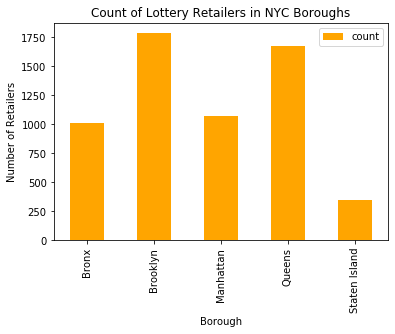

<Figure size 432x288 with 0 Axes>

In [22]:
# Chart our borough count data, give it a title, and label the axes
count_chart = retailers_count.plot(kind="bar", color='orange', title="Count of Lottery Retailers in NYC Boroughs")
count_chart.set_xlabel("Borough")
count_chart.set_ylabel("Number of Retailers")
plt.savefig("LotteryRetailerCount")
plt.show()
plt.tight_layout()

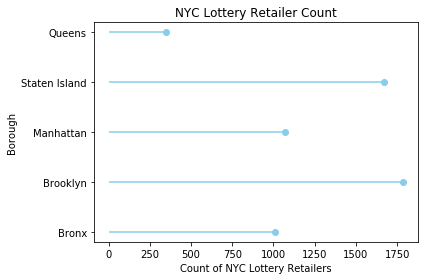

In [23]:
# Try Lollipop chart visual
plt.hlines(y=np.arange(1,6),xmin=0,xmax=retailers_count['count'], color="skyblue")
plt.plot(combined_data3.groupby(['Borough'])['Zipcode'].count(), np.arange(1,6), "o", color="skyblue")
plt.yticks(np.arange(1,6), combined_data3['Borough'].unique())
plt.title("NYC Lottery Retailer Count")
plt.xlabel("Count of NYC Lottery Retailers")
plt.ylabel("Borough")
plt.tight_layout()
plt.savefig("LollipopLotteryRetailerCount")
plt.show()

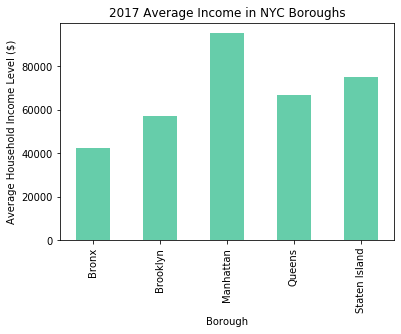

<Figure size 432x288 with 0 Axes>

In [24]:
# Split up our data into groups based upon 'borough'
boroughs = combined_data3.groupby('Borough')

# Find out the average household income per borough
avg_incomes = boroughs['Average Household Income (Per Borough)'].mean()

# Chart our data, give it a title, and label the axes
income_chart = avg_incomes.plot(kind="bar", color='mediumaquamarine', title="2017 Average Income in NYC Boroughs")
income_chart.set_xlabel("Borough")
income_chart.set_ylabel("Average Household Income Level ($)")
plt.savefig("2017AverageIncomeComparison")
plt.show()
plt.tight_layout()

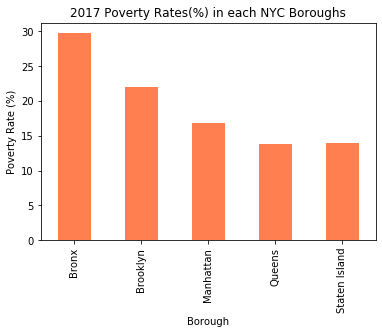

<Figure size 432x288 with 0 Axes>

In [25]:
# Find the poverty rate per borough
avg_poverty_rates = boroughs['Poverty Rate(%)'].mean()

# Chart our data, give it a title, and label the axes
poverty_chart = avg_poverty_rates.plot(kind="bar", color='coral', title="2017 Poverty Rates(%) in each NYC Boroughs")
poverty_chart.set_xlabel("Borough")
poverty_chart.set_ylabel("Poverty Rate (%)")
plt.savefig("2017PovertyRateComparison")
plt.show()
plt.tight_layout()

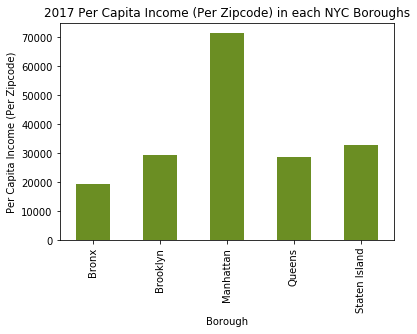

<Figure size 432x288 with 0 Axes>

In [26]:
# Find out the average income per capita per borough
percapita_income = boroughs['Per Capita Income (Per Zipcode)'].mean()

# Chart our data, give it a title, and label the axes
percapita_chart = percapita_income.plot(kind="bar", color='olivedrab', title="2017 Per Capita Income (Per Zipcode) in each NYC Boroughs")
percapita_chart.set_xlabel("Borough")
percapita_chart.set_ylabel("Per Capita Income (Per Zipcode)")
plt.savefig("2017PerCapitaIncomeComparison")
plt.show()
plt.tight_layout()

In [27]:
# Find retailers percapita
# Retailers count
retailers_count = combined_data3.groupby('Borough')['Average Household Income (Per Borough)'].agg(['count'])
# Population per borough
borough_population = combined_data3.groupby('Borough')['Population'].agg(['sum'])
# Combine data
percapita_data = pd.concat([retailers_count, borough_population], axis=1)

percapita_data

,count,sum
Borough,,
Bronx,1009,68368012.0
Brooklyn,1785,140705454.0
Manhattan,1069,47412250.0
Queens,1673,94386070.0
Staten Island,347,15910121.0


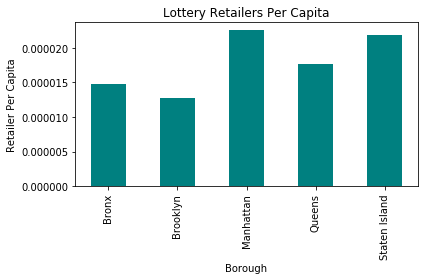

In [28]:
# Chart retailers per capita
retailer_per_person = [.00001476, .00001269, .00002255, .00001773, .00002181]
x_axis = np.arange(len(retailer_per_person))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"], rotation="vertical")

plt.title("Lottery Retailers Per Capita")
plt.xlabel("Borough")
plt.ylabel("Retailer Per Capita")
plt.bar(x_axis, retailer_per_person, color='teal', width=0.5, align = "center")
plt.tight_layout()
plt.savefig("LotteryRetailersPerCapita")

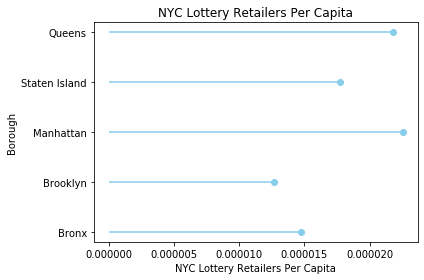

In [29]:
# Try Lollipop chart visual
plt.hlines(y=np.arange(1,6),xmin=0,xmax=retailer_per_person, color="skyblue")
plt.plot(retailer_per_person, np.arange(1,6), "o", color="skyblue")
plt.yticks(np.arange(1,6), combined_data3['Borough'].unique())
plt.title("NYC Lottery Retailers Per Capita")
plt.xlabel("NYC Lottery Retailers Per Capita")
plt.ylabel("Borough")
plt.tight_layout()
plt.savefig("LollipopLotteryRetailerPerCapita")
plt.show()